# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [8]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [43]:
iris_dataset_1 = np.delete(iris_dataset['data'], 1, axis=1).copy()
iris_dataset_2 = np.delete(iris_dataset['data'], 0, axis=1).copy()


### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [44]:
# если работаете в интерактивной оболочке IPython 


from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

**Пример** построения трехмерного графика

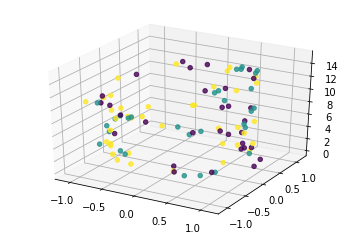

In [ ]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

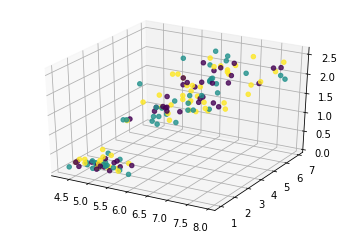

In [45]:
ax = plt.axes(projection='3d')
zdata = iris_dataset_1[:, 2]
ydata = iris_dataset_1[:, 1]
xdata = iris_dataset_1[:, 0]
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=0.8, c=colors)

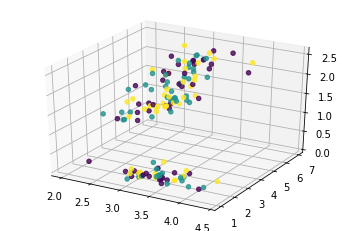

In [46]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_2[:, 2]
ydata = iris_dataset_2[:, 1]
xdata = iris_dataset_2[:, 0]
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=0.8, c=colors)

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], test_size=0.2, random_state=17)

knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1_model = knn_1.fit(x_train_1, y_train_1)
knn_predictions_1 = knn_1.predict(x_test_1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], test_size=0.2, random_state=17)

knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2_model = knn_2.fit(x_train_2, y_train_2)
knn_predictions_2 = knn_2.predict(x_test_2)


### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [49]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9666666666666667


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [57]:
accuracy = 0
best_neighbors = 0
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(x_train_1, y_train_1)
    knn_predictions_1 = knn_1.predict(x_test_1)
    accuracy_test = accuracy_score(y_test_1, knn_predictions_1)
    if accuracy < accuracy_test:
        best_neighbors = i
        accuracy = accuracy_test
    
print(f'Best Accuracy: {accuracy}, Best neighbors: {best_neighbors}')

Best Accuracy: 0.9666666666666667, Best neighbors: 1
